In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [ ]:
def cal_iou(box1, box2, wh=False):
    """
    compute the iou of two boxes.
    Args:
            box1, box2: [xmin, ymin, xmax, ymax] (wh=False) or [xcenter, ycenter, w, h] (wh=True)
            wh: the format of coordinate.
    Return:
    """
    if wh == False:
        xmin1, ymin1, xmax1, ymax1 = box1
        xmin2, ymin2, xmax2, ymax2 = box2
    else:
        xmin1, ymin1 = int(box1[0] - box1[2] / 2.0), int(box1[1] - box1[3] / 2.0)
        xmax1, ymax1 = int(box1[0] + box1[2] / 2.0), int(box1[1] + box1[3] / 2.0)
        xmin2, ymin2 = int(box2[0] - box2[2] / 2.0), int(box2[1] - box2[3] / 2.0)
        xmax2, ymax2 = int(box2[0] + box2[2] / 2.0), int(box2[1] + box2[3] / 2.0)
    
    # 获取矩形框交集对应的左上角和右下角的坐标(intersection)
    xx1 = np.max([xmin1, xmin2])
    yy1 = np.max([ymin1, ymin2])
    xx2 = np.min([xmax1, xmax2])
    yy2 = np.min([ymax1, ymax2])
    
    area1 = (xmax1-xmin1) * (ymax1-ymin1) 
    area2 = (xmax2-xmin2) * (ymax2-ymin2)
    inter_area = (np.max([0, xx2-xx1])) * (np.max([0, yy2-yy1]))#计算交集面积
    iou = inter_area / (area1+area2-inter_area+1e-6)
    
    return iou

In [5]:
def plot_boxes(box1, box2):
    """
    绘制两个矩形框
    参数：
    box1: [xmin, ymin, xmax, ymax] 第一个矩形框
    box2: [xmin, ymin, xmax, ymax] 第二个矩形框
    """
    # 创建绘图
    fig, ax = plt.subplots(1, figsize=(8, 8))
    
    # 第一个矩形框
    rect1 = patches.Rectangle(
        (box1[0], box1[1]),  # 左下角
        box1[2] - box1[0],   # 宽度
        box1[3] - box1[1],   # 高度
        linewidth=2, edgecolor='r', facecolor='none', label='Box 1'
    )
    ax.add_patch(rect1)
    
    # 第二个矩形框
    rect2 = patches.Rectangle(
        (box2[0], box2[1]),  # 左下角
        box2[2] - box2[0],   # 宽度
        box2[3] - box2[1],   # 高度
        linewidth=2, edgecolor='b', facecolor='none', label='Box 2'
    )
    ax.add_patch(rect2)
    
    # 设置图形参数
    ax.set_xlim(0, max(box1[2], box2[2]) + 10)
    ax.set_ylim(0, max(box1[3], box2[3]) + 10)
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(handles=[rect1, rect2], labels=['Box 1', 'Box 2'])
    plt.title('Visualization of Two Boxes')
    plt.grid()
    plt.show()

In [6]:
box1 = [1, 1, 3, 3]
box2 = [2, 2, 4, 4]

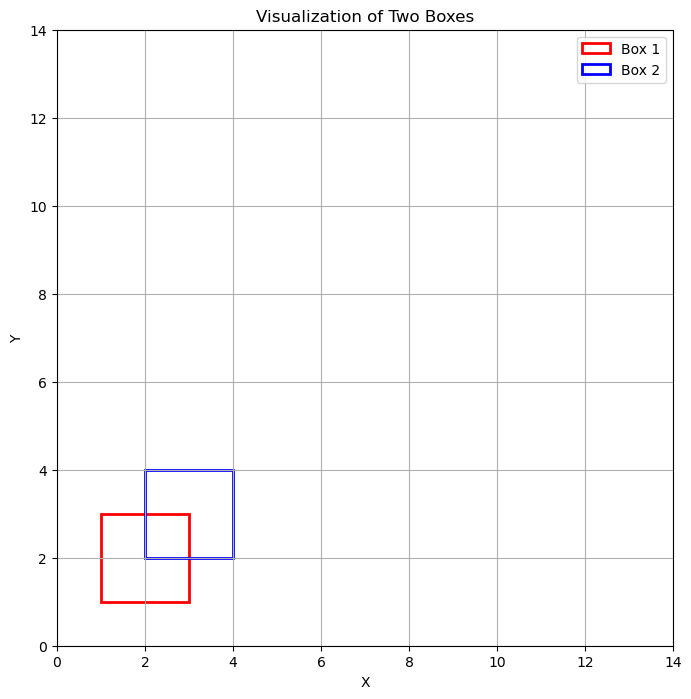

In [7]:
plot_boxes(box1=box1, box2=box2)

In [8]:
cal_iou(box1=box1, box2=box2)

0.1428571224489825

In [9]:
1 / 7

0.14285714285714285